In [5]:
import pandas as pd
import os

files = os.listdir('../Data/rmsds')
first = True
data = pd.read_csv("../Data/rmsds/5HT2B_rmsds.csv")

for file in files:
    if file[-4:] == '.csv' and file != '5HT2B_rmsds.csv':
        fileData = pd.read_csv("../Data/rmsds/" + file)
        data = pd.concat([data, fileData])
data.head()

,protein,start ligand,target ligand,rmsd,bfactor,normalized bfactor,normal variate bfactor,res name,secondary structure
0,5HT2B,4IB4,5TVN,0.368520,52.945714,0.654235,-0.932384,W,1
1,5HT2B,4IB4,5TVN,0.330603,52.298750,0.646240,-0.953941,L,1
2,5HT2B,4IB4,5TVN,0.856963,52.543750,0.649268,-0.945777,D,1
3,5HT2B,4IB4,5TVN,0.155572,48.340000,0.597323,-1.085850,V,1
4,5HT2B,4IB4,5TVN,0.190161,46.298333,0.572095,-1.153880,S,1


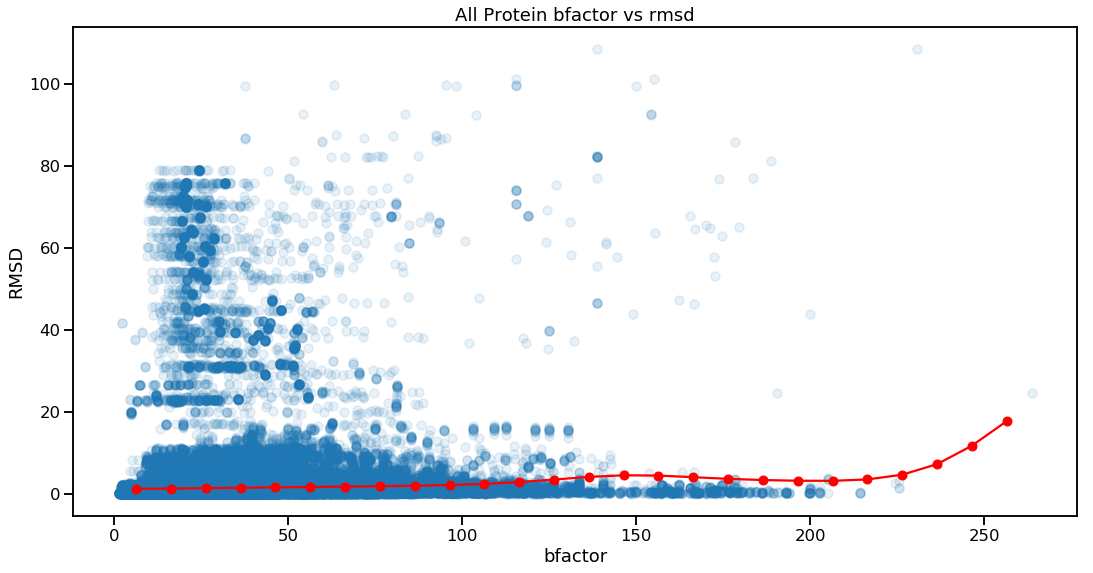

In [10]:
import numpy as np
import matplotlib.pyplot as plt
def weighted_moving_average(x,y,step_size=0.05,width=1):
    bin_centers  = np.arange(np.min(x),np.max(x)-0.5*step_size,step_size)+0.5*step_size
    bin_avg = np.zeros(len(bin_centers))

    #We're going to weight with a Gaussian function
    def gaussian(x,amp=1,mean=0,sigma=1):
        return amp*np.exp(-(x-mean)**2/(2*sigma**2))

    for index in range(0,len(bin_centers)):
        bin_center = bin_centers[index]
        weights = gaussian(x,mean=bin_center,sigma=width)
        bin_avg[index] = np.average(y,weights=weights)

    return (bin_centers,bin_avg)

plt.scatter(data['bfactor'], data['rmsd'], alpha=0.1)
x_avg, y_avg = weighted_moving_average(data['bfactor'], data['rmsd'], step_size=10, width=20)
plt.plot(x_avg, y_avg, 'o-', color='r')    
plt.title('All Protein bfactor vs rmsd')
plt.xlabel('bfactor')
plt.ylabel('RMSD')
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Set figure width to 12 and height to 9
fig_size[0] = 18
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
plt.show()
plt.show()

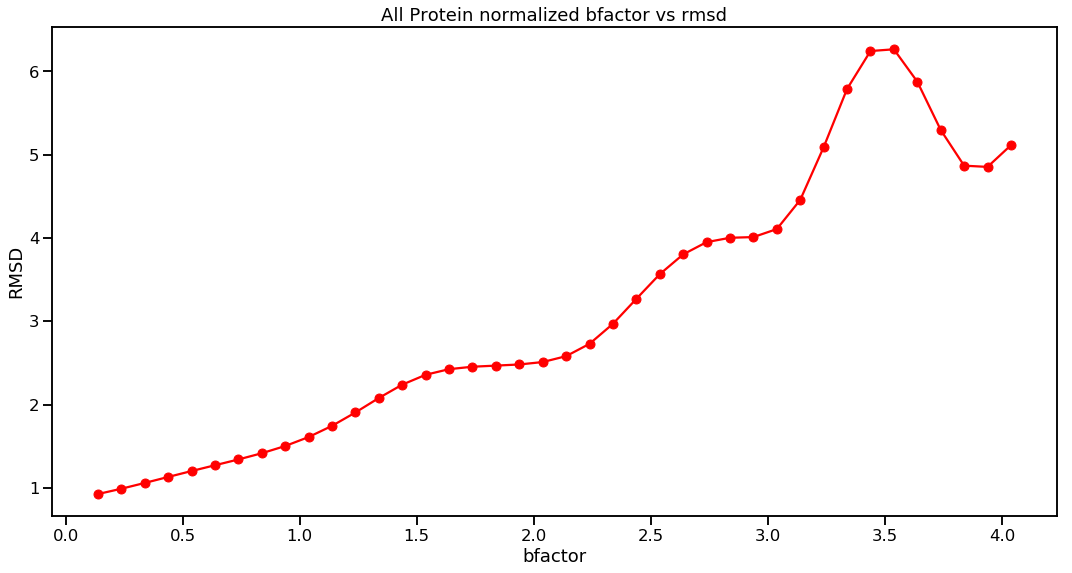

In [7]:
import numpy as np
def weighted_moving_average(x,y,step_size=0.05,width=1):
    bin_centers  = np.arange(np.min(x),np.max(x)-0.5*step_size,step_size)+0.5*step_size
    bin_avg = np.zeros(len(bin_centers))

    #We're going to weight with a Gaussian function
    def gaussian(x,amp=1,mean=0,sigma=1):
        return amp*np.exp(-(x-mean)**2/(2*sigma**2))

    for index in range(0,len(bin_centers)):
        bin_center = bin_centers[index]
        weights = gaussian(x,mean=bin_center,sigma=width)
        bin_avg[index] = np.average(y,weights=weights)

    return (bin_centers,bin_avg)

#plt.scatter(data['normalized bfactor'], data['rmsd'], alpha=0.1)
x_avg_norm, y_avg_norm = weighted_moving_average(data['normalized bfactor'], data['rmsd'], step_size=0.1, width=0.2)
plt.plot(x_avg_norm, y_avg_norm, 'o-', color='r')    
plt.title('All Protein normalized bfactor vs rmsd')
plt.xlabel('bfactor')
plt.ylabel('RMSD')
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Set figure width to 12 and height to 9
fig_size[0] = 18
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
plt.show()
plt.show()

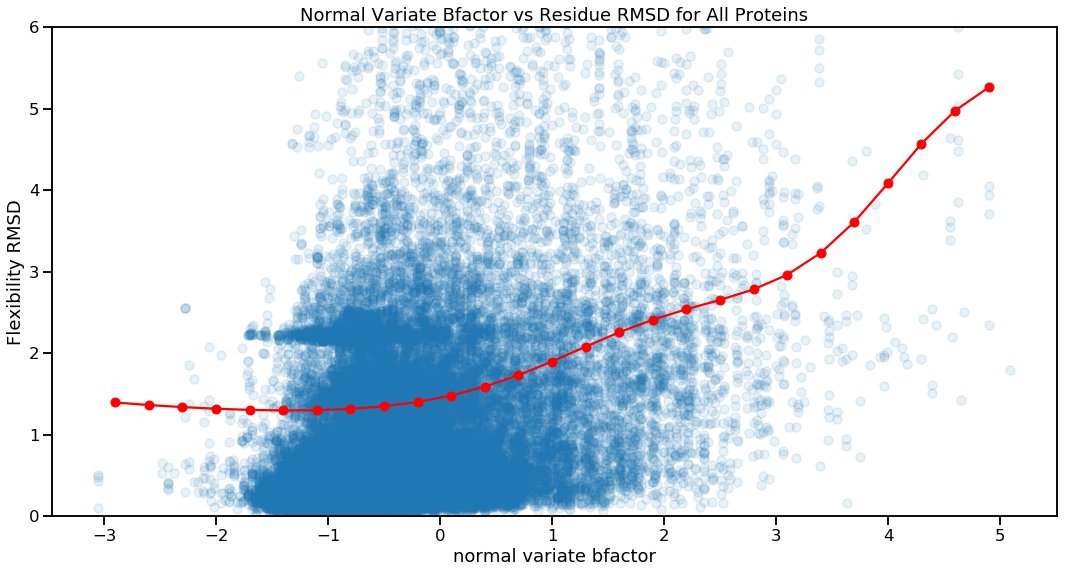

In [24]:
import numpy as np
def weighted_moving_average(x,y,step_size=0.05,width=1):
    bin_centers  = np.arange(np.min(x),np.max(x)-0.5*step_size,step_size)+0.5*step_size
    bin_avg = np.zeros(len(bin_centers))

    #We're going to weight with a Gaussian function
    def gaussian(x,amp=1,mean=0,sigma=1):
        return amp*np.exp(-(x-mean)**2/(2*sigma**2))

    for index in range(0,len(bin_centers)):
        bin_center = bin_centers[index]
        weights = gaussian(x,mean=bin_center,sigma=width)
        bin_avg[index] = np.average(y,weights=weights)

    return (bin_centers,bin_avg)

plt.scatter(data['normal variate bfactor'][0::5], data['rmsd'][0::5], alpha=0.1)
plt.ylim((0, 6))
x_avg_norm, y_avg_norm = weighted_moving_average(data['normal variate bfactor'], data['rmsd'], step_size=0.3, width=0.75)
plt.plot(x_avg_norm, y_avg_norm, 'o-', color='r')    
plt.title('Normal Variate Bfactor vs Residue RMSD for All Proteins')
plt.xlabel('normal variate bfactor')
plt.ylabel('Flexibility RMSD')
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Set figure width to 12 and height to 9
fig_size[0] = 18
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
plt.show()
plt.show()

In [6]:
flex_res_dict = {}

for i, rmsd in enumerate(data['rmsd']):
    if data.iloc[i]['protein'] not in flex_res_dict:
        flex_res_dict[data.iloc[i]['protein']] = {}
    if data.iloc[i]['start ligand'] not in flex_res_dict[data.iloc[i]['protein']]:
        flex_res_dict[data.iloc[i]['protein']][data.iloc[i]['start ligand']] = {}
    if data.iloc[i]['target ligand'] not in flex_res_dict[data.iloc[i]['protein']][data.iloc[i]['start ligand']]:
        flex_res_dict[data.iloc[i]['protein']][data.iloc[i]['start ligand']][data.iloc[i]['target ligand']] = 0
    if data.iloc[i]['rmsd'] > 2:
        flex_res_dict[data.iloc[i]['protein']][data.iloc[i]['start ligand']][data.iloc[i]['target ligand']] += 1
    

In [7]:
import statistics
avg_by_protein = []
for protein in sorted(flex_res_dict.keys()):
    flex_res = []
    for start_ligand in flex_res_dict[protein]:
        flex_res += list(flex_res_dict[protein][start_ligand].values())
    avg_by_protein.append([protein, statistics.mean(flex_res)])

flex_res = pd.DataFrame(avg_by_protein)
flex_res.columns = ['protein', 'avg num flex res']

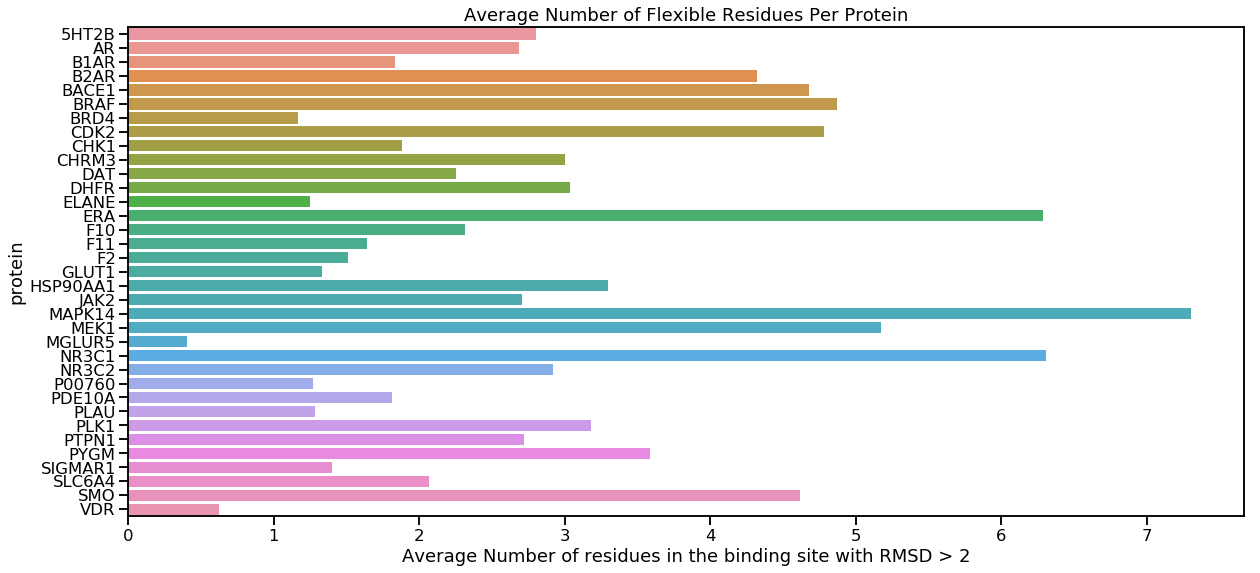

In [13]:
import seaborn as sns

sns.set_context("talk", font_scale=1.0)
#sns.set(style="whitegrid")
ax = sns.barplot(flex_res['avg num flex res'], flex_res['protein'])
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Set figure width to 12 and height to 9
fig_size[0] = 20
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
plt.title('Average Number of Flexible Residues Per Protein')
plt.xlabel('Average Number of residues in the binding site with RMSD > 2')
plt.show()

In [13]:
print("Average of average number of flexibile residues across all proteins:", statistics.mean(flex_res['avg num flex res']))

counter = 0

for rmsd in enumerate(data['rmsd']):
    if rmsd[1] > 2:
        counter += 1
        
print("Percentage of all residues that are flexibile:", counter * 100 / len(data['rmsd']))

Average number of flexibile residues across all proteins: 2.923117253020283
Percentage of all residues that are flexibile: 13.822038836267057


In [14]:
num_res_dict = {}

for i, rmsd in enumerate(data['rmsd']):
    if data.iloc[i]['protein'] not in num_res_dict:
        num_res_dict[data.iloc[i]['protein']] = {}
    if data.iloc[i]['start ligand'] not in num_res_dict[data.iloc[i]['protein']]:
        num_res_dict[data.iloc[i]['protein']][data.iloc[i]['start ligand']] = {}
    if data.iloc[i]['target ligand'] not in num_res_dict[data.iloc[i]['protein']][data.iloc[i]['start ligand']]:
        num_res_dict[data.iloc[i]['protein']][data.iloc[i]['start ligand']][data.iloc[i]['target ligand']] = 0
    num_res_dict[data.iloc[i]['protein']][data.iloc[i]['start ligand']][data.iloc[i]['target ligand']] += 1

In [15]:
avg_num_res_by_protein = []
for protein in sorted(flex_res_dict.keys()):
    num_res = []
    for start_ligand in num_res_dict[protein]:
        num_res += list(num_res_dict[protein][start_ligand].values())
    avg_num_res_by_protein.append([protein, statistics.mean(num_res)])

num_res = pd.DataFrame(avg_num_res_by_protein)
num_res.columns = ['protein', 'avg num res']


In [1]:
sns.set_context("talk", font_scale=1.0)
#sns.set(style="whitegrid")
ax = sns.barplot(num_res['avg num res'], num_res['protein'])
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Set figure width to 12 and height to 9
fig_size[0] = 20
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
plt.title('Average Number of Residues')
plt.show()


NameError: name 'sns' is not defined

In [21]:
print("Average of average number of residues across all proteins:", statistics.mean(num_res['avg num res']))


Average of average number of residues across all proteins: 23.41475739549664
